## 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_inflation = pd.read_csv('datasets/Inflation1.csv')
df_gdp = pd.read_csv('datasets/GDP.csv')

In [3]:
df_inflation = df_inflation[df_inflation['REF_AREA_NAME'] == 'South Africa'].reset_index()
df_gdp = df_gdp[df_gdp['REF_AREA_NAME'] == 'South Africa'].reset_index()

drop_cols = [
    'REF_AREA_ID','FREQ_ID', 'index', 'FREQ_NAME', 'INDICATOR_ID', 'UNIT_MEASURE_ID', 'AGG_METHOD_ID', 'INDICATOR_ID','INDICATOR_NAME', 'UNIT_MEASURE_ID', 
    'UNIT_MEASURE_NAME','AGG_METHOD_ID', 'AGG_METHOD_NAME', 'DECIMALS_ID', 'DECIMALS_NAME','DATABASE_ID_ID','DATABASE_ID_NAME', 'COMMENT_TS', 
    'UNIT_MULT_ID','UNIT_MULT_NAME', 'DATA_SOURCE_ID', 'DATA_SOURCE_NAME', 'OBS_STATUS_ID',	'OBS_STATUS_NAME','OBS_CONF_ID','OBS_CONF_NAME'
    ]

df_gdp = df_gdp.drop(columns=drop_cols)
df_inflation = df_inflation.drop(columns=drop_cols)

for df in [df_gdp, df_inflation]:
    df.rename(columns={'REF_AREA_NAME': 'Country'}, inplace=True)

df_gdp.fillna(df_gdp.mean(numeric_only=True), inplace=True)
df_inflation.fillna(df_inflation.mean(numeric_only=True), inplace=True)

df_inflation


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,South Africa,1.288859,2.102374,1.246285,1.33797,2.534973,4.069029,3.489234,3.538992,1.986136,...,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727,6.073909


In [4]:
inflation_long = df_inflation.melt(
    id_vars='Country',
    var_name='Year',
    value_name='Inflation'
)

gdp_long = df_gdp.melt(
    id_vars='Country',
    var_name='Year',
    value_name='GDP'
)

inflation_long['Year'] = inflation_long['Year'].astype(int)
gdp_long['Year'] = gdp_long['Year'].astype(int)

merged_df = pd.merge(inflation_long, gdp_long, on=['Country', 'Year'])

merged_df

,Country,Year,Inflation,GDP
0,South Africa,1961,2.102374,3.844734
1,South Africa,1962,1.246285,6.177931
2,South Africa,1963,1.337970,7.373709
3,South Africa,1964,2.534973,7.939609
4,South Africa,1965,4.069029,6.122798
...,...,...,...,...
58,South Africa,2019,4.120246,0.259936
59,South Africa,2020,3.210036,-6.168918
60,South Africa,2021,4.611672,4.955033
61,South Africa,2022,7.039727,1.911480


In [5]:
merged_df.describe()

,Year,Inflation,GDP
count,63.000000,63.000000,63.000000
mean,1992.000000,7.839404,2.786620
std,18.330303,4.565871,2.640099
min,1961.000000,-0.692030,-6.168918
25%,1976.500000,4.528904,1.277710
50%,1992.000000,6.425708,3.014480
75%,2007.500000,11.339223,4.563252
max,2023.000000,18.654919,7.939609


## 2. Numerical Analysis

In [6]:
years = merged_df['Year'].to_numpy()
inflation = merged_df['Inflation'].to_numpy()
gdp = merged_df['GDP'].to_numpy()

### Inflation Stats

In [7]:
inf_mean = round(np.mean(inflation), 2)
inf_std = round(np.std(inflation), 2)
inf_min = round(np.min(inflation), 2)
inf_max = round(np.max(inflation), 2)

In [8]:
inf_mean 

7.84

In [9]:
inf_std 

4.53

In [10]:
inf_min

-0.69

In [11]:
inf_max

18.65

### GDP Stats

In [12]:
gdp_mean = round(np.mean(gdp), 2)
gdp_std = round(np.std(gdp), 2)
gdp_min = round(np.min(gdp), 2)
gdp_max = round(np.max(gdp), 2)

In [13]:
gdp_mean

2.79

In [14]:
gdp_std

2.62

In [15]:
gdp_min

-6.17

In [16]:
gdp_max

7.94

### Correlation between GDP and Inflation over the years

In [17]:
corr = np.corrcoef(gdp, inflation)[0,1]
corr

-0.34762233428258915

### Year over Year changes in Inflation and GDP

In [18]:
gdp_yoy = np.diff(gdp)
infl_yoy = np.diff(inflation)

In [19]:
gdp

array([ 3.84473414,  6.17793085,  7.37370925,  7.93960864,  6.1227981 ,
        4.43838609,  7.19652307,  4.15337298,  4.71590287,  5.24866143,
        4.2789344 ,  1.65482971,  4.57194475,  6.1111221 ,  1.69543378,
        2.24986033, -0.09397912,  3.01447978,  3.79051926,  6.62058343,
        5.36079106, -0.38341911, -1.84655775,  5.09915163, -1.21154088,
        0.01784924,  2.10072902,  4.20010965,  2.39479512, -0.31776043,
       -1.01824497, -2.13703285,  1.23355794,  3.2       ,  3.1       ,
        4.3       ,  2.6       ,  0.5       ,  2.4       ,  4.2       ,
        2.7       ,  3.7003744 ,  2.94907547,  4.55455991,  5.27705197,
        5.60380646,  5.36047405,  3.19104389, -1.53808914,  3.03973288,
        3.16855628,  2.39623238,  2.48546801,  1.41382645,  1.32186224,
        0.66455231,  1.15794695,  1.55678385,  0.25993558, -6.16891771,
        4.95503259,  1.91147996,  0.69848519])

In [20]:
gdp_yoy.round(2)

array([ 2.33,  1.2 ,  0.57, -1.82, -1.68,  2.76, -3.04,  0.56,  0.53,
       -0.97, -2.62,  2.92,  1.54, -4.42,  0.55, -2.34,  3.11,  0.78,
        2.83, -1.26, -5.74, -1.46,  6.95, -6.31,  1.23,  2.08,  2.1 ,
       -1.81, -2.71, -0.7 , -1.12,  3.37,  1.97, -0.1 ,  1.2 , -1.7 ,
       -2.1 ,  1.9 ,  1.8 , -1.5 ,  1.  , -0.75,  1.61,  0.72,  0.33,
       -0.24, -2.17, -4.73,  4.58,  0.13, -0.77,  0.09, -1.07, -0.09,
       -0.66,  0.49,  0.4 , -1.3 , -6.43, 11.12, -3.04, -1.21])

In [21]:
gdp_yoy = gdp_yoy.reshape(-1,1)
infl_yoy = infl_yoy.reshape(-1,1)

gdp_yoy

array([[ 2.33319671],
       [ 1.1957784 ],
       [ 0.5658994 ],
       [-1.81681055],
       [-1.68441201],
       [ 2.75813698],
       [-3.04315008],
       [ 0.56252988],
       [ 0.53275856],
       [-0.96972703],
       [-2.62410469],
       [ 2.91711504],
       [ 1.53917736],
       [-4.41568832],
       [ 0.55442655],
       [-2.34383945],
       [ 3.1084589 ],
       [ 0.77603948],
       [ 2.83006416],
       [-1.25979237],
       [-5.74421017],
       [-1.46313864],
       [ 6.94570938],
       [-6.31069251],
       [ 1.22939012],
       [ 2.08287978],
       [ 2.09938063],
       [-1.80531453],
       [-2.71255554],
       [-0.70048454],
       [-1.11878788],
       [ 3.37059078],
       [ 1.96644206],
       [-0.1       ],
       [ 1.2       ],
       [-1.7       ],
       [-2.1       ],
       [ 1.9       ],
       [ 1.8       ],
       [-1.5       ],
       [ 1.0003744 ],
       [-0.75129894],
       [ 1.60548444],
       [ 0.72249207],
       [ 0.32675449],
       [-0

### Separating arrays into Apartheid and Post-Apartheid to analyse the mean between the two periods


In [22]:
apartheid_mask = years <= 1993
post_apartheid_mask = years >= 1994

gdp_apartheid = gdp[apartheid_mask]
gdp_post = gdp[post_apartheid_mask]


infl_apartheid = inflation[apartheid_mask]
infl_post = inflation[post_apartheid_mask]


mean_gdp_apartheid = np.mean(gdp_apartheid)
mean_gdp_post = np.mean(gdp_post)
mean_infl_apartheid = np.mean(infl_apartheid)
mean_infl_post = np.mean(infl_post)


### Analysing the Volatility of the two eras

In [23]:
std_gdp_apartheid = np.std(gdp_apartheid)
std_gdp_post = np.std(gdp_post)
std_infl_apartheid = np.std(infl_apartheid)
std_infl_post = np.std(infl_post)

### Analysing extreme years for Inflation and GDP

In [24]:
worst_gdp_year = years[np.argmin(gdp)]
best_gdp_year = years[np.argmax(gdp)]
worst_inf_year = years[np.argmax(inflation)]
best_inf_year = years[np.argmin(inflation)]


## 3. Visualizations


Correlation Between GDP nad Inflation 

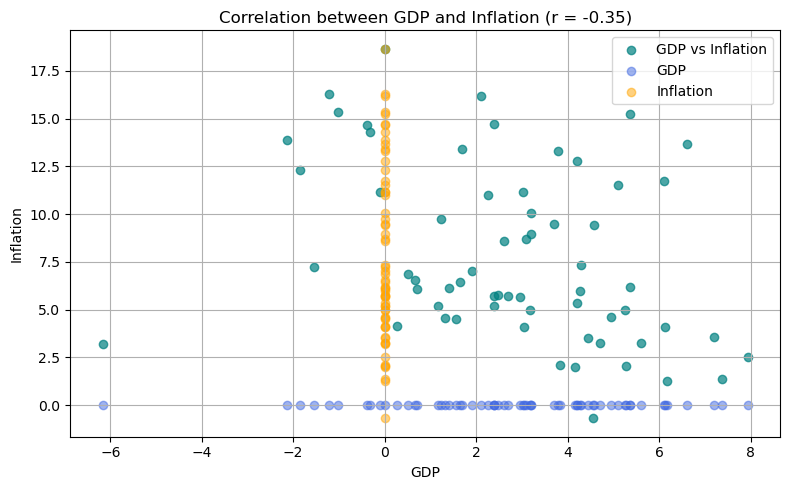

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(gdp, inflation, color='teal', alpha=0.7, label='GDP vs Inflation')
plt.scatter(gdp, [0]*len(gdp), color='royalblue', alpha=0.5, label='GDP')         # GDP points on x-axis
plt.scatter([0]*len(inflation), inflation, color='orange', alpha=0.5, label='Inflation')  # Inflation points on y-axis
plt.xlabel('GDP')
plt.ylabel('Inflation')
plt.title(f'Correlation between GDP and Inflation (r = {corr:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot shows a moderate negative relationship (r = -0.35) between GDP and inflation. This means that when GDP is higher, inflation is usually lower and more stable, while when GDP is low or negative, inflation is often higher and more unpredictable. Most of the data points fall between GDP values of 0 to 6 and inflation values of 2 to 10. Overall, the pattern suggests that stronger economies tend to keep inflation under control, while weaker economies struggle with higher inflation.

Year Over Year Changes In Inflation and GPD using a linegraph 

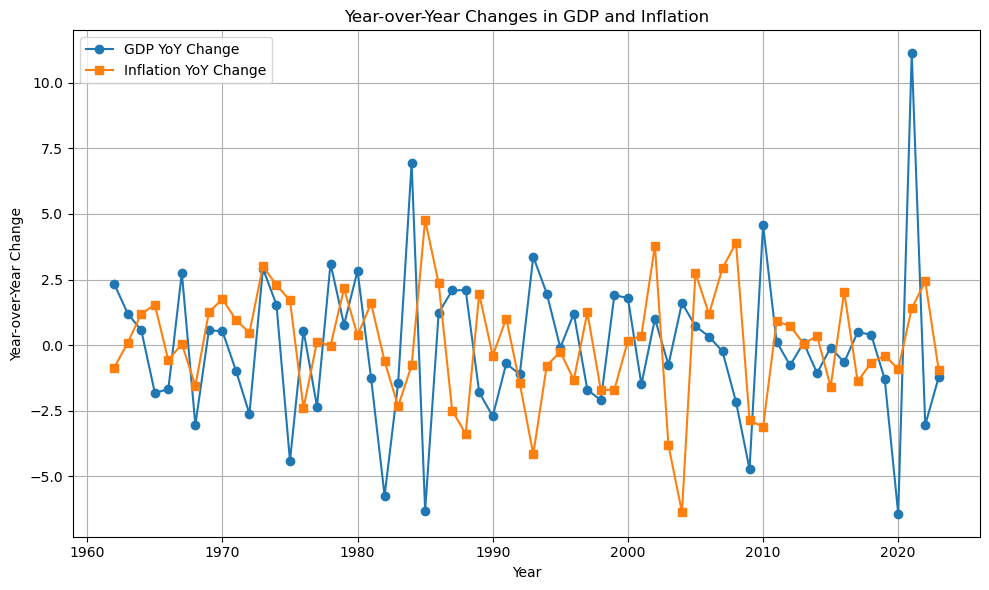

In [32]:
import matplotlib.pyplot as plt

# Calculate the years for year-over-year changes 
yoy_years = years[1:]

plt.figure(figsize=(10, 6))
plt.plot(yoy_years, gdp_yoy.flatten(), label='GDP YoY Change', marker='o')
plt.plot(yoy_years, infl_yoy.flatten(), label='Inflation YoY Change', marker='s')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Change')
plt.title('Year-over-Year Changes in GDP and Inflation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

he chart shows that GDP and inflation have fluctuated widely from 1960 to 2023, with GDP experiencing sharper rises and falls, especially during major economic events like the 1980s recession, the 2008 (brics)crisis, and the 2020 pandemic. Inflation has been more stable but showed significant peaks in the 1970s and recent increases after 2020. Overall, GDP tends to be more volatile, while inflation moves in smaller swings, and the two often shift in opposite directions during economic downturns.

Pie Chart 

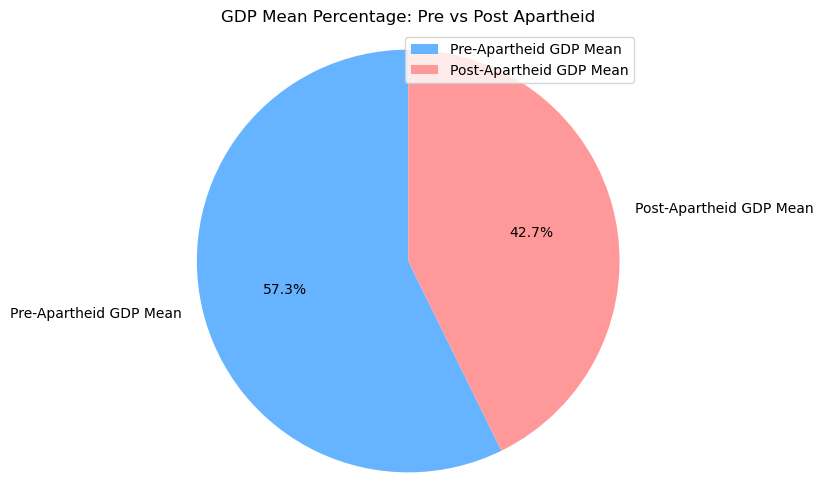

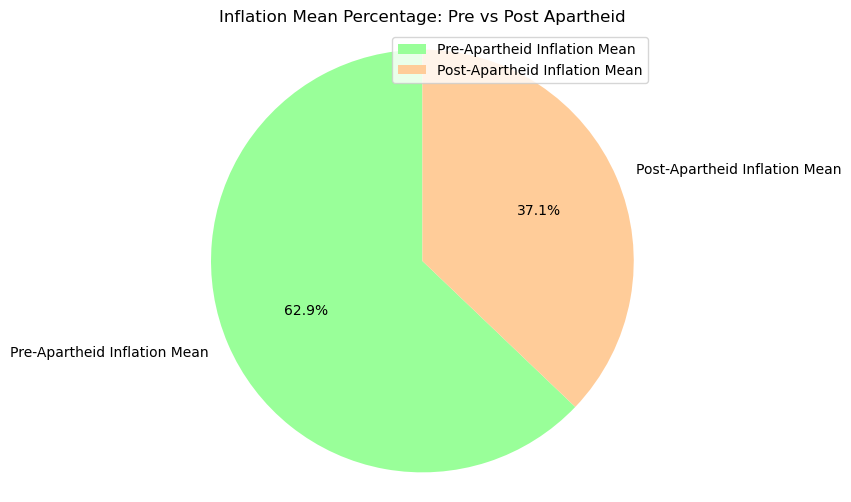

In [33]:
import matplotlib.pyplot as plt

# Calculate total mean for percentage
total_gdp_mean = mean_gdp_apartheid + mean_gdp_post
total_infl_mean = mean_infl_apartheid + mean_infl_post

# GDP Pie Chart
gdp_means = [mean_gdp_apartheid, mean_gdp_post]
gdp_labels = ['Pre-Apartheid GDP Mean', 'Post-Apartheid GDP Mean']

plt.figure(figsize=(6, 6))
plt.pie(gdp_means, labels=gdp_labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('GDP Mean Percentage: Pre vs Post Apartheid')
plt.legend(gdp_labels, loc='upper right')
plt.axis('equal')
plt.show()

# Inflation Pie Chart
infl_means = [mean_infl_apartheid, mean_infl_post]
infl_labels = ['Pre-Apartheid Inflation Mean', 'Post-Apartheid Inflation Mean']

plt.figure(figsize=(6, 6))
plt.pie(infl_means, labels=infl_labels, autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#ffcc99'])
plt.title('Inflation Mean Percentage: Pre vs Post Apartheid')
plt.legend(infl_labels, loc='upper right')
plt.axis('equal')
plt.show()

Based on the pie charts, we observe that both the average GDP and average inflation were higher during the pre-apartheid era compared to the post-apartheid era. This suggests that, historically, South Africa experienced stronger economic growth and higher inflation before the end of apartheid. In the post-apartheid era, both GDP and inflation means are lower, indicating a period of slower economic growth and more stable inflation. This trend may reflect structural changes in the economy, policy shifts, or broader global and domestic influences after apartheid.

Bar Graph

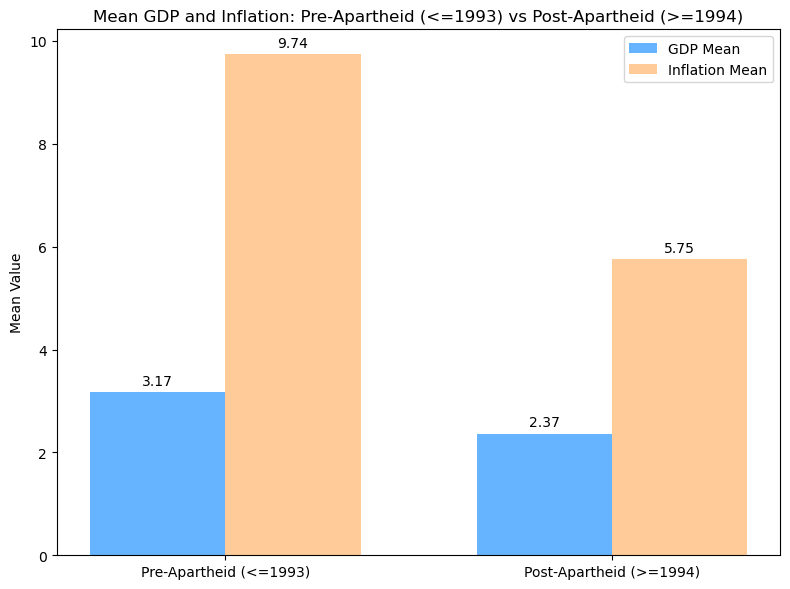

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Years 
years_labels = ['Pre-Apartheid (<=1993)', 'Post-Apartheid (>=1994)']

# Means for GDP and Inflation
gdp_means = [mean_gdp_apartheid, mean_gdp_post]
infl_means = [mean_infl_apartheid, mean_infl_post]

x = np.arange(len(years_labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, gdp_means, width, label='GDP Mean', color='#66b3ff')
rects2 = ax.bar(x + width/2, infl_means, width, label='Inflation Mean', color='#ffcc99')

ax.set_ylabel('Mean Value')
ax.set_title('Mean GDP and Inflation: Pre-Apartheid (<=1993) vs Post-Apartheid (>=1994)')
ax.set_xticks(x)
ax.set_xticklabels(years_labels)
ax.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()

This suggests that both economic growth (GDP) and inflation were higher before the end of apartheid, while the post-apartheid era has seen lower average GDP and more moderate inflation. The chart highlights the economic changes that occurred in South Africa across these two historical periods.

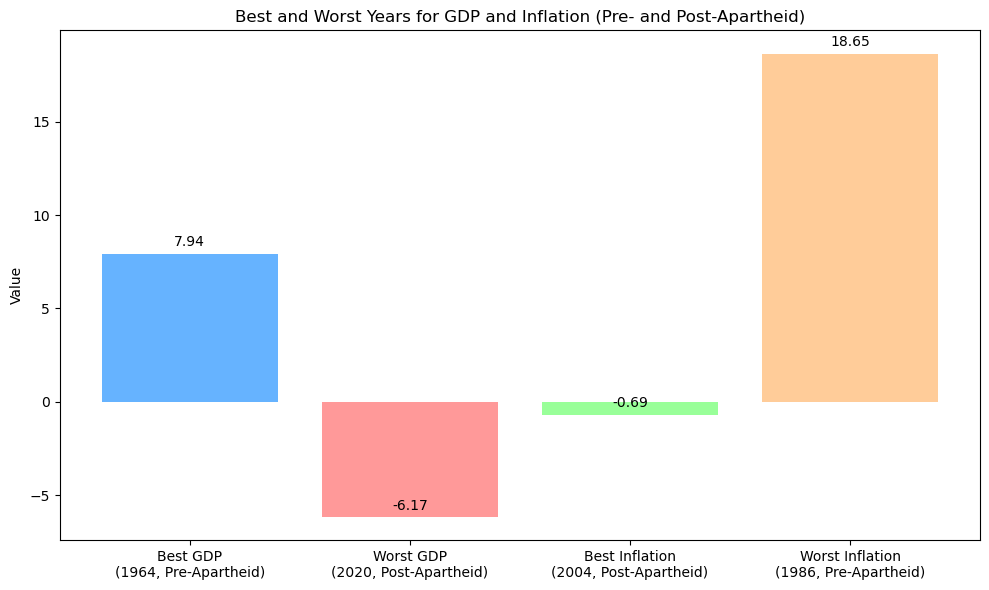

In [35]:
import matplotlib.pyplot as plt
import numpy as np


worst_gdp_value = gdp[np.argmin(gdp)]
best_gdp_value = gdp[np.argmax(gdp)]
worst_inf_value = inflation[np.argmax(inflation)]
best_inf_value = inflation[np.argmin(inflation)]


def get_era(year):
    return 'Pre-Apartheid' if year <= 1993 else 'Post-Apartheid'

labels = [
    f'Best GDP\n({int(best_gdp_year)}, {get_era(best_gdp_year)})',
    f'Worst GDP\n({int(worst_gdp_year)}, {get_era(worst_gdp_year)})',
    f'Best Inflation\n({int(best_inf_year)}, {get_era(best_inf_year)})',
    f'Worst Inflation\n({int(worst_inf_year)}, {get_era(worst_inf_year)})'
]
values = [best_gdp_value, worst_gdp_value, best_inf_value, worst_inf_value]
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.ylabel('Value')
plt.title('Best and Worst Years for GDP and Inflation (Pre- and Post-Apartheid)')
plt.tight_layout()

Best GDP occurred in 1964 (pre-apartheid) with a high positive value, indicating strong economic growth during that year.
Worst GDP occurred in 2020 (post-apartheid) with a significant negative value, reflecting a major economic downturn, likely due to the COVID-19 pandemic.
Best Inflation (lowest inflation rate) was in 2004 (post-apartheid), showing a period of price stability.
Worst Inflation (highest inflation rate) was in 1986 (pre-apartheid), indicating a year of severe price increases.

analysing the Volatility of the two eras

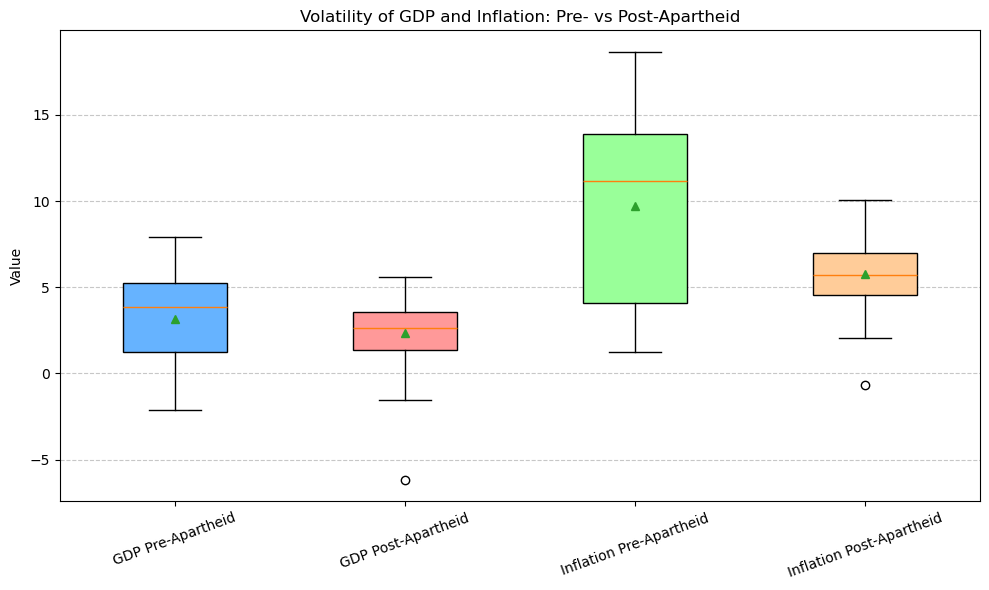

In [36]:
import matplotlib.pyplot as plt

# Prepare data for boxplots
data = [
    gdp_apartheid, gdp_post,
    infl_apartheid, infl_post
]
labels = [
    'GDP Pre-Apartheid', 'GDP Post-Apartheid',
    'Inflation Pre-Apartheid', 'Inflation Post-Apartheid'
]
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']

plt.figure(figsize=(10, 6))
box = plt.boxplot(data, patch_artist=True, labels=labels, showmeans=True)

# Color the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Value')
plt.title('Volatility of GDP and Inflation: Pre- vs Post-Apartheid')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

GDP and inflation behaved before and after apartheid.

GDP: Before apartheid, GDP grew faster but was more unpredictable, with bigger ups and downs. After apartheid, GDP became steadier but the average growth was lower.

Inflation: Before apartheid, inflation was very unstable and often very high. After apartheid, inflation became much more stable and stayed at lower levels.

the economy after apartheid had slower but steadier growth and much better control over inflation compared to the more volatile period before apartheid.